In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
spot_2021 = pd.read_csv("./Final_Inputs/spot_2021_new.csv", delimiter=";", decimal=",", parse_dates=["date"])
spot_2020 = pd.read_csv("./Final_Inputs/spot_2020_new.csv", delimiter=";", decimal=",", parse_dates=["date"])

In [6]:
for i in range(len(spot_2021)):
    spot_2021.loc[i, "hid"] = spot_2021.loc[i, "date"].hour
    spot_2020.loc[i, "hid"] = spot_2020.loc[i, "date"].hour

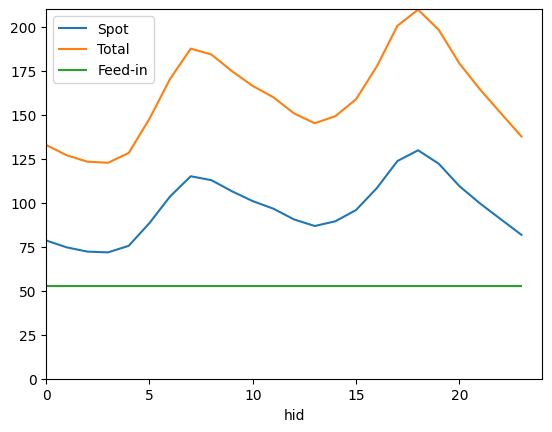

In [7]:
spot_mean_per_hour = spot_2021.groupby("hid")[spot_2021.columns[1]].mean()
total_mean_per_hour = (spot_mean_per_hour + 10) * 1.5
spot_mean_per_hour.plot()
total_mean_per_hour.plot()
plt.xlim([0, 24])
plt.ylim([0, 210])
plt.plot(np.ones(24)*52.5)
plt.legend(["Spot", "Total", "Feed-in"])
plt.show()

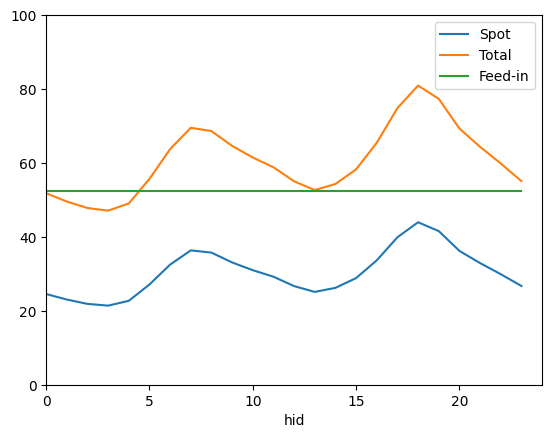

In [25]:
spot_mean_per_hour = spot_2020.groupby("hid")[spot_2020.columns[1]].mean()
total_mean_per_hour = (spot_mean_per_hour + 10) * 1.5
spot_mean_per_hour.plot()
total_mean_per_hour.plot()
plt.xlim([0, 24])
plt.ylim([0, 100])
plt.plot(np.ones(24)*52.5)
plt.legend(["Spot", "Total", "Feed-in"])
plt.show()

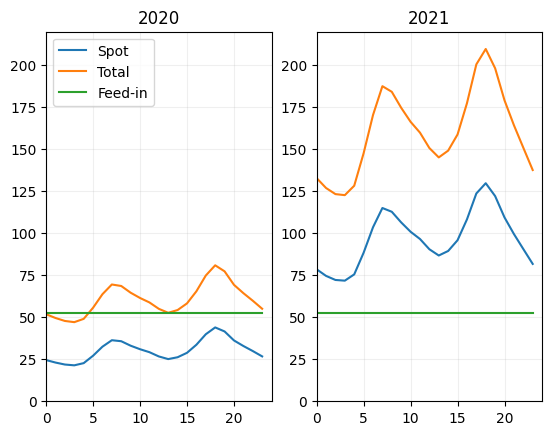

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# title 2020
spot_mean_per_hour_2020 = spot_2020.groupby("hid")[spot_2020.columns[1]].mean()
total_mean_per_hour_2020 = (spot_mean_per_hour_2020 + 10) * 1.5

# title 2021
spot_mean_per_hour_2021 = spot_2021.groupby("hid")[spot_2021.columns[1]].mean()
total_mean_per_hour_2021 = (spot_mean_per_hour_2021 + 10) * 1.5

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot for 2020
ax1.plot(spot_mean_per_hour_2020)
ax1.plot(total_mean_per_hour_2020)
ax1.plot(np.ones(24) * 52.5)
ax1.set_xlim([0, 24])
ax1.set_ylim([0, 220])
ax1.legend(["Spot", "Total", "Feed-in"], loc="upper left")
ax1.grid(alpha=0.2)
ax1.set_title("2020")

# Plot for 2021
ax2.plot(spot_mean_per_hour_2021)
ax2.plot(total_mean_per_hour_2021)
ax2.plot(np.ones(24) * 52.5)
ax2.set_xlim([0, 24])
ax2.set_ylim([0, 220])
ax2.set_title("2021")
ax2.grid(alpha=0.2)

plt.savefig("2020_2021_pv.pdf")
# Display the plot
plt.show()
